In [1]:
### Main script to visualize WRF domian defined namelist.wps
### Written by Chenchong, adapted from Dr. Xiaodong Chen's work

import numpy as np
import xarray as xr
import os

import matplotlib
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
#from geocat.viz import util as gvutil

import WRFDomainLib
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
print("success")

success


# main code

In [5]:
DEMFile = '/Path-to-dem-file/ETOPO1.0_1degree.nc'
WPSFile = '/Path-to-namelist_wps-file/namelist.wps'

In [6]:
DEMDs = xr.open_dataset(DEMFile)
dem = DEMDs['DEM'].values
# high-res data
#dem = DEMDs['z'].values
dem_lat = DEMDs['lat'].values
dem_lon = DEMDs['lon'].values

dem_lons, dem_lats = np.meshgrid(dem_lon, dem_lat)

for i in np.arange(dem.shape[0]):
    for j in np.arange(dem.shape[1]):
        if dem[i,j]<0:
            dem[i,j]=0
print("success")

success


In [7]:
#wps_path = '/export/project/WRF/WRFCHEMv43/Chenchong_files/plot_codes/plot_domain'
#os.chdir(wps_path)
wpsproj, latlonproj, corner_lat_full, corner_lon_full, length_x, length_y = WRFDomainLib.calc_wps_domain_info(WPSFile)
print("success")

success


In [8]:
cmap = matplotlib.cm.terrain
vmin = 0
vmax = 3000

/home/chzhang/anaconda3/envs/wrfpy_env/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1785: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = super().pcolormesh(*args, **kwargs)


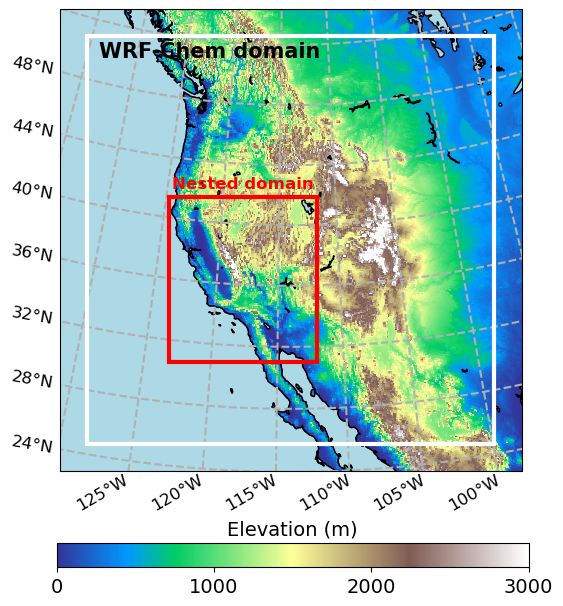

In [9]:
fig1 = plt.figure(figsize=(8,6))
#ax1 = plt.subplot(1, 1, 1, projection=wpsproj)
ax1 = plt.axes(projection=wpsproj)

ax1.pcolormesh(dem_lons, dem_lats, dem, cmap=cmap, vmin=vmin, vmax=vmax, alpha=1, transform=ccrs.PlateCarree(), zorder=0)

# d01
corner_x1, corner_y1 = WRFDomainLib.reproject_corners(corner_lon_full[0,:], corner_lat_full[0,:], wpsproj, latlonproj)
ax1.set_xlim([corner_x1[0]-length_x[0]/15, corner_x1[3]+length_x[0]/15])
ax1.set_ylim([corner_y1[0]-length_y[0]/15, corner_y1[3]+length_y[0]/15])


# d01 box
ax1.add_patch(matplotlib.patches.Rectangle((corner_x1[0], corner_y1[0]),  length_x[0], length_y[0], 
                                    fill=None, lw=3, edgecolor='white', zorder=2))
ax1.text(corner_x1[0]+length_x[0]*0.03, corner_y1[0]+length_y[0]*0.95, 'WRF-Chem domain',
         fontweight='bold', size=15, color='black', zorder=2)

# add city text
#ax1.text(corner_x1[0]+length_x[0]*0.07, corner_y1[0]+length_y[0]*0.325, 
         #'Los Angeles',fontweight='bold', size=14, color='yellow', zorder=2)
# add point
#ax1.text(corner_x1[0]+length_x[0]*0.288, corner_y1[0]+length_y[0]*0.38, 
         #'.', fontweight='bold',size=38, color='yellow', zorder=2)

# add point
#ax1.text(corner_x1[0]+length_x[0]*0.322, corner_y1[0]+length_y[0]*0.397, 
         #'X', fontweight='bold',size=26, color='red', zorder=2)

#ax1.text(corner_x1[0]+length_x[0]*0.03, corner_y1[0]+length_y[0]*0.95, 'WRF-Chem domain',
         #fontweight='bold', size=15, color='black', zorder=2)

# d02 box
corner_x2, corner_y2 = WRFDomainLib.reproject_corners(corner_lon_full[1,:], corner_lat_full[1,:], wpsproj, latlonproj)
ax1.add_patch(matplotlib.patches.Rectangle((corner_x2[0], corner_y2[0]),  length_x[1], length_y[1], 
                                    fill=None, lw=3, edgecolor='red', zorder=2))
ax1.text(corner_x2[0]+length_x[1]*0.02, corner_y2[0]+length_y[1]*1.05, 'Nested domain',
         fontweight='bold', size=12, color='red', zorder=2)

# d03 box
#corner_x3, corner_y3 = WRFDomainLib.reproject_corners(corner_lon_full[2,:], corner_lat_full[2,:], wpsproj, latlonproj)
#ax1.add_patch(matplotlib.patches.Rectangle((corner_x3[0], corner_y3[0]),  length_x[2], length_y[2],
                                    #fill=None, lw=3, edgecolor='red', zorder=2))
#ax1.text(corner_x3[0]+length_x[2]*0.1, corner_y3[0]+length_y[2]*0.9, 'D03', va='top', ha='left',
         #fontweight='bold', size=15, color='red', zorder=2)


# decorations
ax1.coastlines('50m', linewidth=0.8)
ax1.add_feature(cartopy.feature.OCEAN, edgecolor='k', facecolor='lightblue', zorder=1)
ax1.add_feature(cartopy.feature.LAKES, edgecolor='k', facecolor='lightblue', zorder=1)
states = cartopy.feature.NaturalEarthFeature(category='cultural', scale='50m', facecolor='none',
                             name='admin_1_states_provinces_lines')
ax1.add_feature(states, linewidth=0.5)

#ax1.set_yticks([40, 50, 60], crs = ccrs.LambertConformal())

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', linewidth = 1.5, alpha=1,
                #dms=True,
                x_inline=False, y_inline=False)
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False

# rotate?
gl.xlabel_style = {'size': 12, 'rotation': 30}
gl.ylabel_style = {'size': 12, 'rotation': -10}

# latitude and longitude step
gl.xlocator = matplotlib.ticker.FixedLocator(np.arange(-150,-70,5))
gl.ylocator = matplotlib.ticker.FixedLocator(np.arange(0,81,4))
#gl.ylocator = matplotlib.ticker.FixedLocator([40,50,60])

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

#ax1.set_title('WRF-Chem Domain (Fires in Western North America, 2018)', size=16)
#ax1.set_title('WRF-Chem Domain (NH$_3$ in Imperial Valley, 2020)', size=16)

# set x and y ticks
#ax1.set_xticks([-120,-110,-100], crs = ccrs.PlateCarree())

cbar_ax = fig1.add_axes([0.22, -0.05, 0.59, 0.04])
fig1.colorbar(matplotlib.cm.ScalarMappable(cmap=cmap, norm=matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)),
              cax=cbar_ax, ticks=np.arange(0, vmax+1, 1000), orientation='horizontal')
cbar_ax.tick_params(labelsize=14)
cbar_ax.text((vmin+vmax)/2, 3500, 'Elevation (m)', ha='center', va='bottom', size=14)

#fig1.savefig('WRF_2010Nash_domain.png', dpi=600)

plt.show()
#plt.close()
#del(fig1)